A Brief Introduction to Version Control with Git and Github
===========================================================

# Why do I need to learn about version control?
Reproducibility in Research. This is an important topic and is something that you should not only familiarize yourself with as early as possible, but make a habit to use and employ throughout your scientific career. Hopefully, we know how important it is to document your experiments, your reagents, and your protocols fully. This _must_ also extend into your data analysis. Modern computational biology and bioinformatics workflows often involve using a number of community-supported tools, or custom programs/scripts that you create during the course of designing your workflows.  Using and developing these tools, it is very likely that you will not remember exactly how you performed some component of your workflow, or what specific parameters you set for a given program. And of course, we all make mistakes, and we would prefer to be able to back track through our analysis to find these mistakes, find out when they were introduced, and what the potential consequences are.

Using Notebooks to integrate a narrative and computational analyses for your work is a good first step, but it's not perfect.  What we would like to have is a system where we can make frequent 'checkpoints' in our project analysis.  And keep a log or record of how our projects have changed over time. 

`Git` is one popular tool (certainly not the only one) that attempts to solve some of these issues by providing a mechanism for version control.  It allows you to take snapshots (commits) of a project or directory that can then be referred back to, or shared publicly as you see fit.  The sharing of code/methods/projects openly and publicly also allows you to A) solicit feedback and or identify errors you may have introduced. B) Work on a project collaboratively with multiple people simultaneously (every one can work on their own parts locally and then MERGE them together into a common repository), and C) publish your analysis concurrently with your manuscripts/reports to allow others to reproduce your work and confirm its validity.

As an example, most of the materials for this course were developed on a collaborative GitHub repository: [https://github.com/timplab/bcmb_bootcamp](https://github.com/timplab/bcmb_bootcamp)

### We will be running this code on the command line (NOT in a jupyter notebook). Open up Terminal in JupyterHub by going to File > New > Terminal or selecting terminal from the Launcher. 

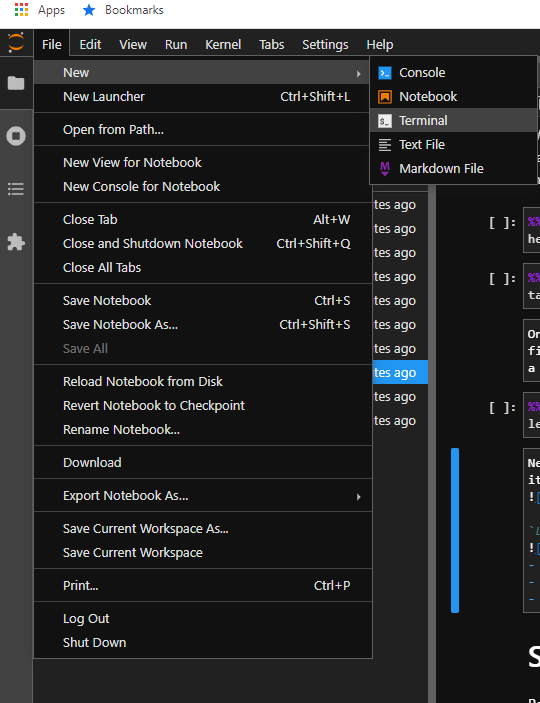

First we can check if you already have git installed by running:

In [ ]:
git --version

If this command returned a version number you already have git installed on your computer, if the command did not return a version number, please follow the install instructions below. 

## Install git and get a github account

* Instructions for installing git locally can be found [here](https://www.atlassian.com/git/tutorials/install-git).
* If you haven't done so already, lets create an account on [Github](https://www.github.com).  GitHub will serve as a central repository for all of your projects.
* Once you install git please configure your local version of git:


In [ ]:
git config --global user.email "user.email" #enter your email in quotations
git config --global user.name "user.name" #enter your user name in quotations

## Create a local git repository

To create a new project/repo for git, the first thing to do is create a new directory for your project

In [ ]:
mkdir myFirstProject

In [ ]:
cd myFirstProject

In [ ]:
# Confirm that we're now in the new directory
pwd

To turn this empty directory into a git repository, we must first 'initialize' it with the command `git init`

In [ ]:
git init

This creates a hidden directory within the current folder called '.git', this is where git will store information about your project, how it changes, and how to integrate and merge your project across different instances of your project.  Rarely if ever do you need to enter or use anything in this folder directly.  All of the git information is self-contained in this one directory.

In [ ]:
ls -larth

## Add files/directories/content to your local repository
Now that we've initialized our new repository.  Lets start adding content.

In [ ]:
touch funFact.txt # create an empty text file with touch

# Add some interesting fact...
echo 'Wolves are monogamous.' > funFact.txt

# Add another directory
mkdir ostrich_info

ls

Once we've made some changes to our project (from nothing to something in this case), we can see what files git has identified and is aware of changes in.

In [ ]:
git status

Notice that our 'ostrich_info' directory is not recognized by git yet.  Git does not care about empty directories.  It only finds/tracks directories in which content (any file) exists.  In order for us to add 'ostrich_info' to our repository, we must first put something in there.

In [ ]:
echo "The Ostrich is the largest bird. They are also pretty mean." > ostrich_info/ostrich_fact.txt

In [ ]:
git status

## Add your content to the staging environment

Ok...now the 'ostrich_info' directory (and everything inside of it) has been found by git.  But all of these files are currently 'untracked'. In order to actually _add_ these changes to our repository, we will have to 'stage' the files for a 'commit'.  A 'commit' is a fixed 'version' or time stamp of your project.  Commits are the way points that allow you to go back to an earlier state of a project at any point.  CHANGES ARE NOT AUTOMATICALLY INCLUDED in a commit.  Files that have changed must manually be added to the tracking or staging environment.  We stage files in this way using the `git add <filename>` command. (inversely `git rm <filename>` can be used to remove or 'unstage' a file.

In [ ]:
git status

git add funFact.txt

git status #see how the status changed after our addition

A shortcut to add all changes to the staging area is to use `git add .`.

In [ ]:
git add .

git status


Now all of our changes are staged. Importantly, they have not been added to a 'commit', this is just a way to help you organize the things/files/changes that you would like to commit.  

## Commit your changes to the local repository

Now we will create our first commit for this project.  To do this, we run the command `git commit -m "Your message here"`.  The `-m` flag stands for message and is a requirement for each commit.  Think of it as a way for you to label each commit with things that have changed or with a specific piece of information about this commit; a new feature, a bug fix, or correcting typos and grammar for example. 

In [ ]:
git commit -m "This is my initial commit for this project."

git status

Ok!  We have our first commit.  We are still on the 'master branch' and `git status` is saying that it hasn't identified any new changes in the directory. We can now see our commit history using `git log`

In [ ]:
git log

Lets make a change to a file in our local repository and see how we might update our project.

In [ ]:
echo "Octopuses can lay over 50,000 eggs at a time." >> funFact.txt

head funFact.txt

In [ ]:
git status

git has now identified that 'funFact.txt' has changed since the last commit. Lets add these new and exciting changes to our repository with a new commit.  First we stage.

In [ ]:
git add funFact.txt

git status

Then we make a new commit.

In [ ]:
git commit -m "Added some very important octopus info"

git status

In [ ]:
git log

# Create a new repository on GitHub and add a remote to your local repository
### Now that we've made some progress on our very important project, lets put this project in a more centralized place where we can share, or work as a team, or just to keep another backup copy in a different location for when we inevitably drop our laptop in a puddle. To do this, we need to go back to GitHub.  On your github landing page, you should find a "+" in the top right:

   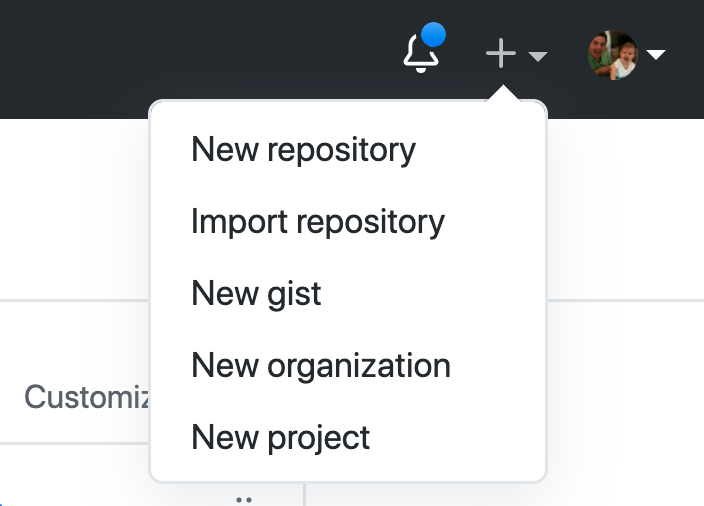



Click on 'New Repository' to continue. You will see a screen like this:

   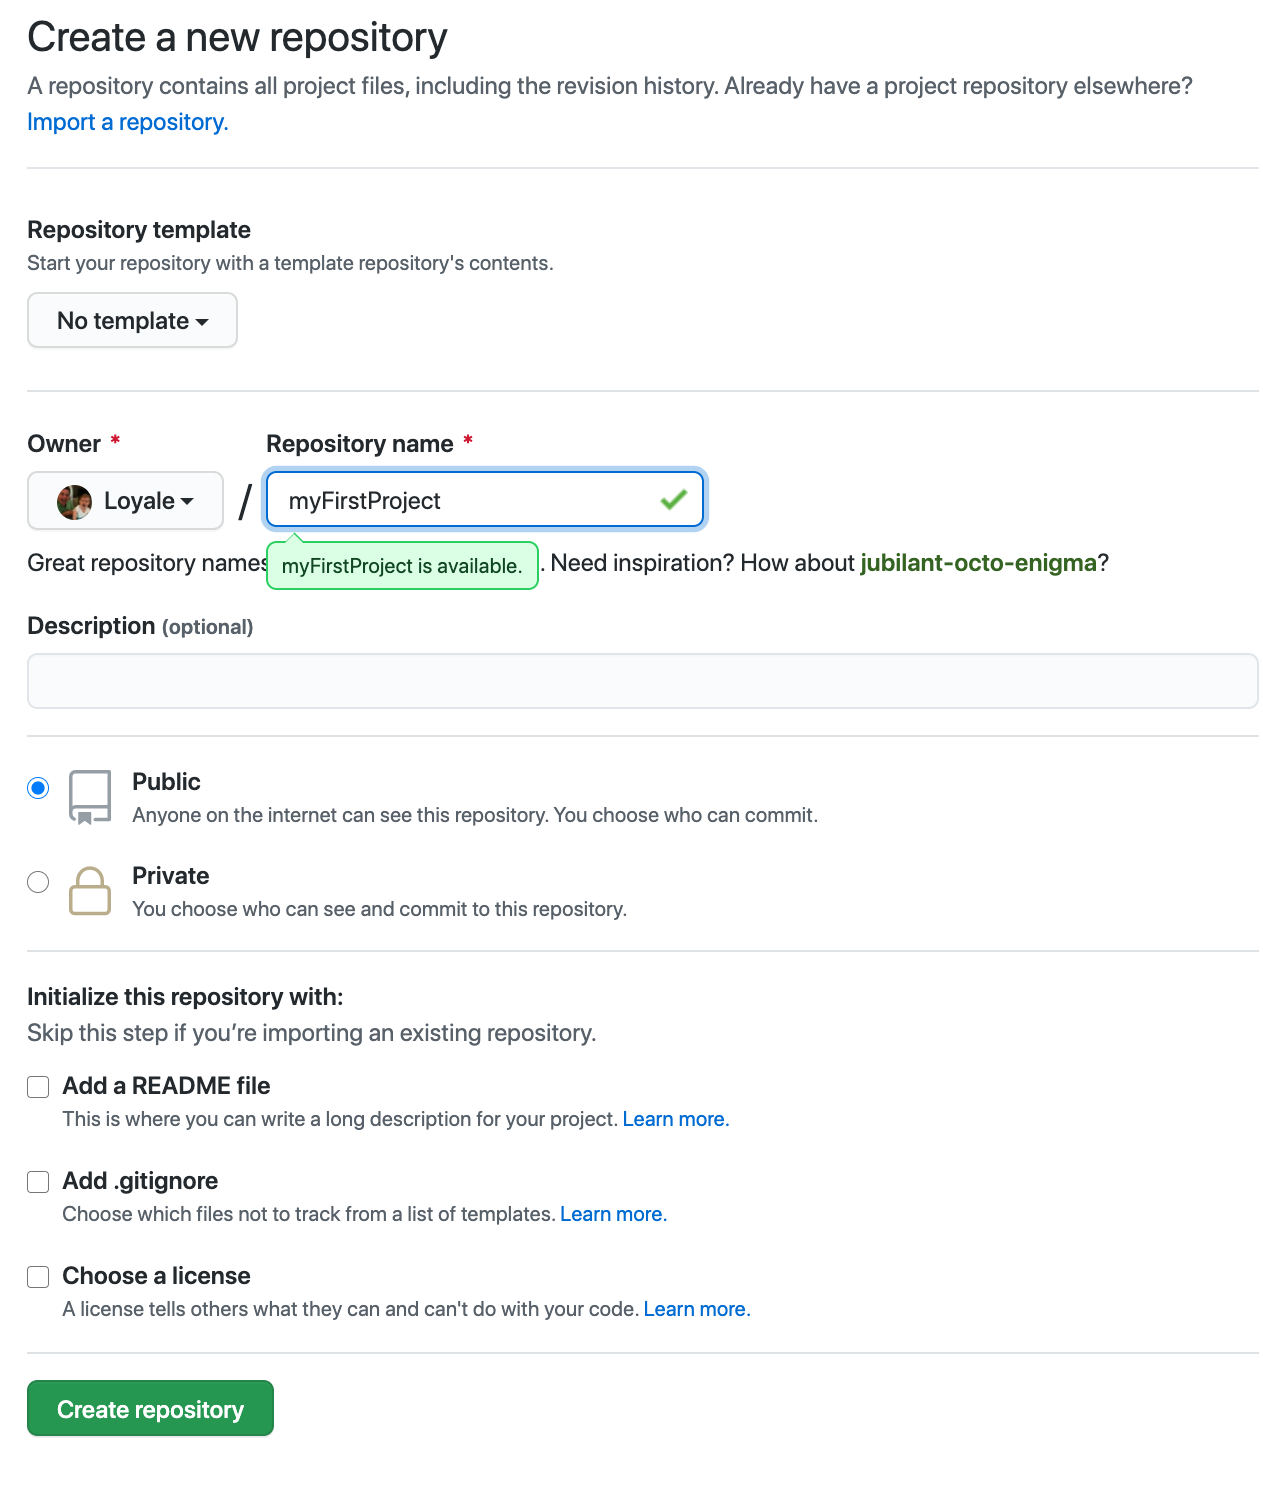



Choose a name for your GitHub repository (makes sense to keep the names the same, but whatever). And make sure to keep this repository public. When you click on 'Create Repository', your repository will be created and GitHub will show you a few ways to get started. Since we've already created and worked on a repository, we will use the following instructions:

   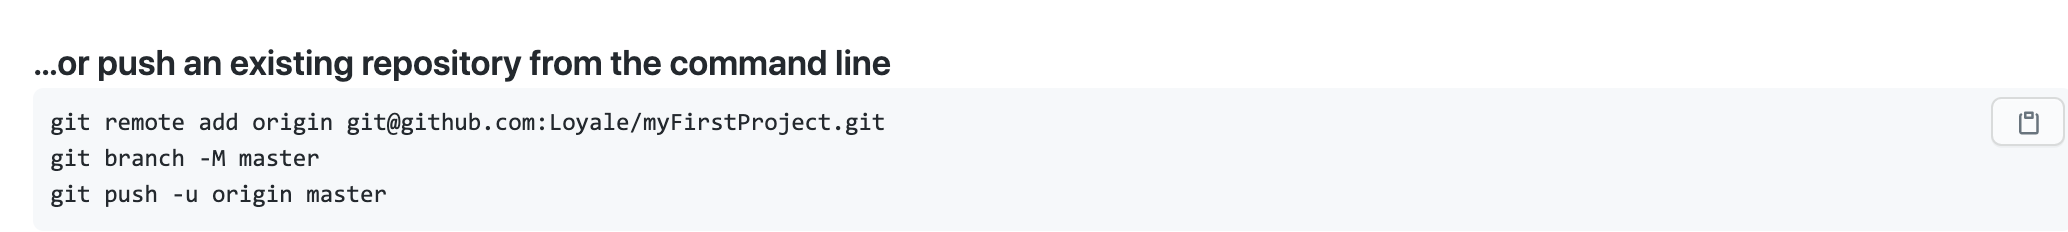



Let's add this remote (on GitHub) repository as the `origin` (this is just convention, you can call it whatever you like, but most folks refer to their primary GitHub repo for a project as the 'origin').  We also haven't talked much about branches yet, but for now, its enough to know that the main branch (or only branch if you haven't created others) is initially referred to as the 'master' branch.

In [ ]:
git remote add origin <your_URL_here> # in the above example this would be https://github.com/Loyale/myFirstProject.git
git branch -M master

In [ ]:
git remote -v # this should show your url for pushing and fetching next to the name origin

## Now let's create a token

Tokens are used for authentication of git operations (passwords aren't enough anymore!). For our next step where you will push your branch up to github, you will be asked to verify your account using your GitHub username and token. To generate a token click on your profile icon and select "settings" from the dropdown menu.

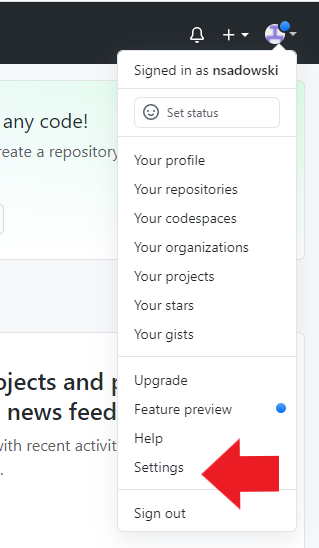

Next, select "developer settings" from the bottom of the menu on the left.

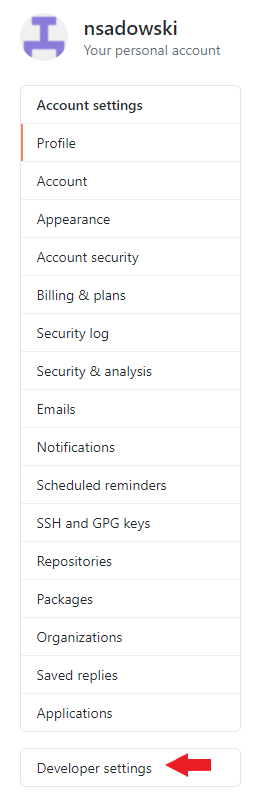

Next, select "personal access tokens" from the menu on the left and then select "Generate new token"

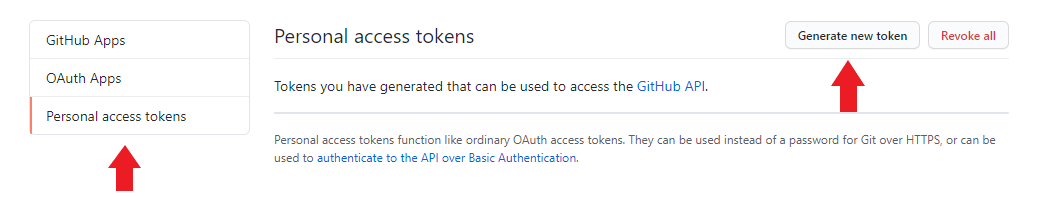

Finally, enter your token identity, select the timeframe for expiration, and ensure that the box next to `repo` is checked. Then scroll to the bottom of the page and click "generate token"

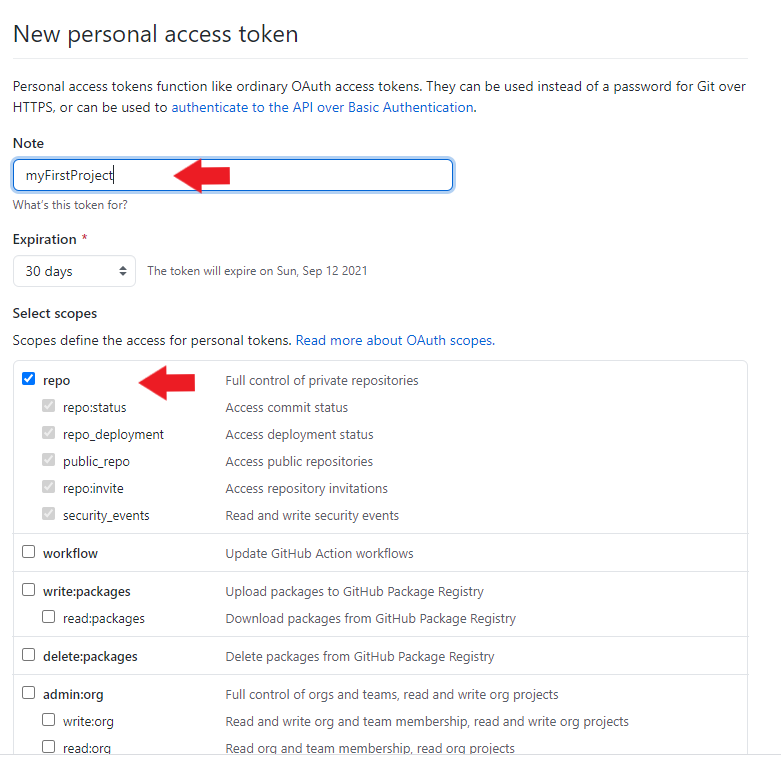

<font color='red'>(COPY YOUR NEWLY GENERATED PERSONAL ACCESS TOKEN AND DO NOT LOSE IT!)</font>:

Now return to your command line (Terminal or Linux distribution) with your fancy new token and let's commit this sitch! Use the following command:

In [ ]:
git push origin master

You will be prompted to enter your GitHub username and password. You username is the username you chose when you created your GitHub accound and your password is the token that you just created. 
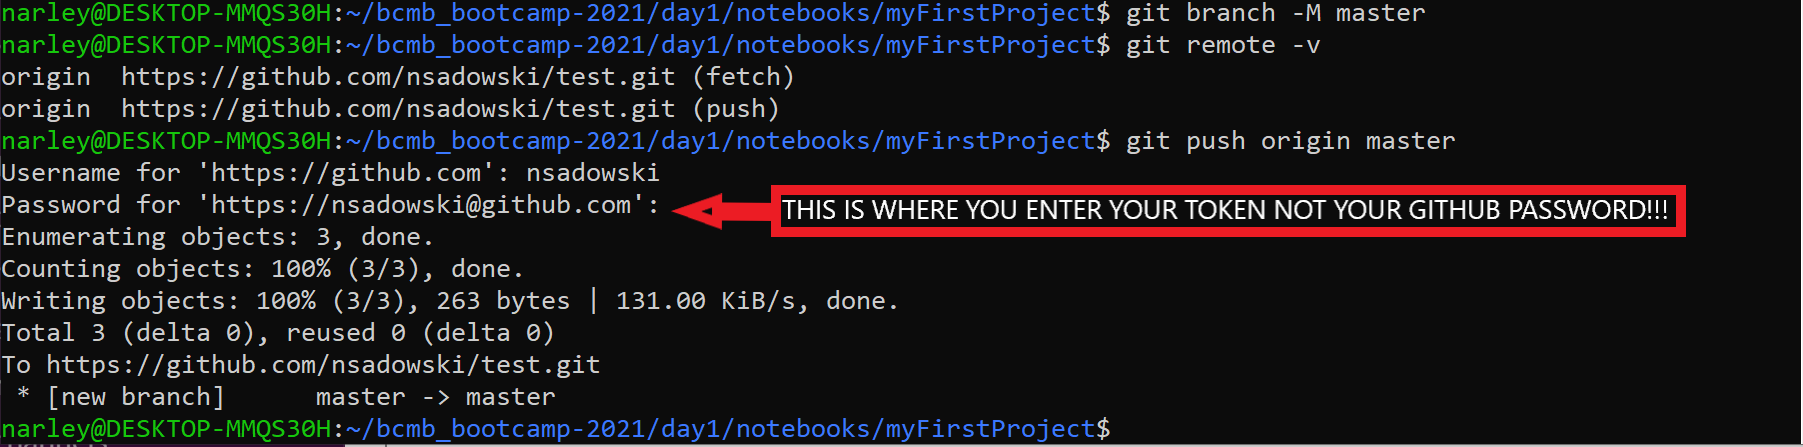

Congrats! You just pushed a commit up to GitHub!

## Pull changs on GitHub back to your local repository
Now let's say you want to make some edits in GitHub rather than through the command line. You can go to your git repository, select the *funfact.txt* file, and click the pencil icon to edit the file directly in Github. You can then scroll to the bottom of the page and commit those changes like so: 

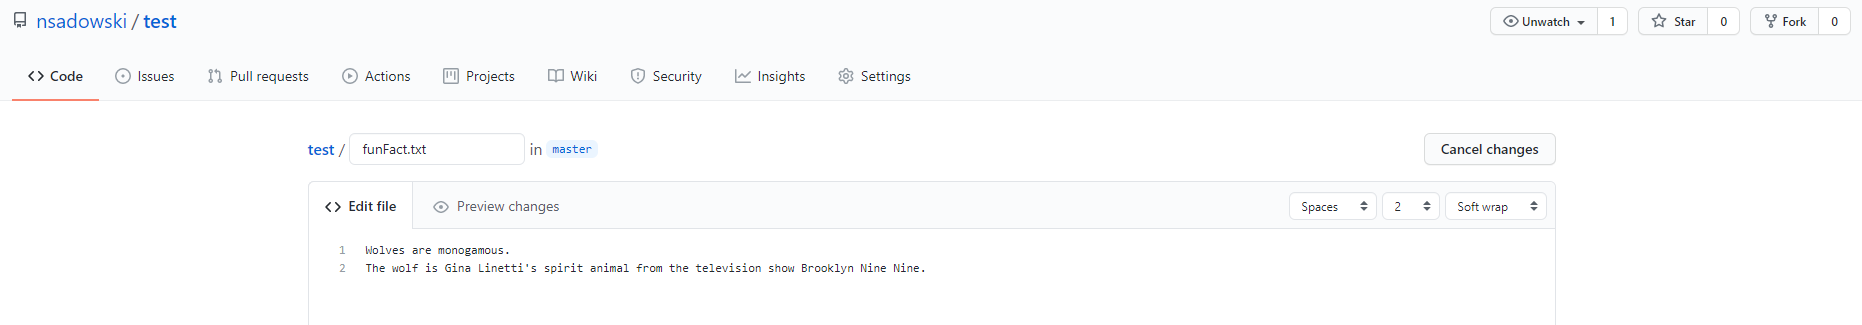
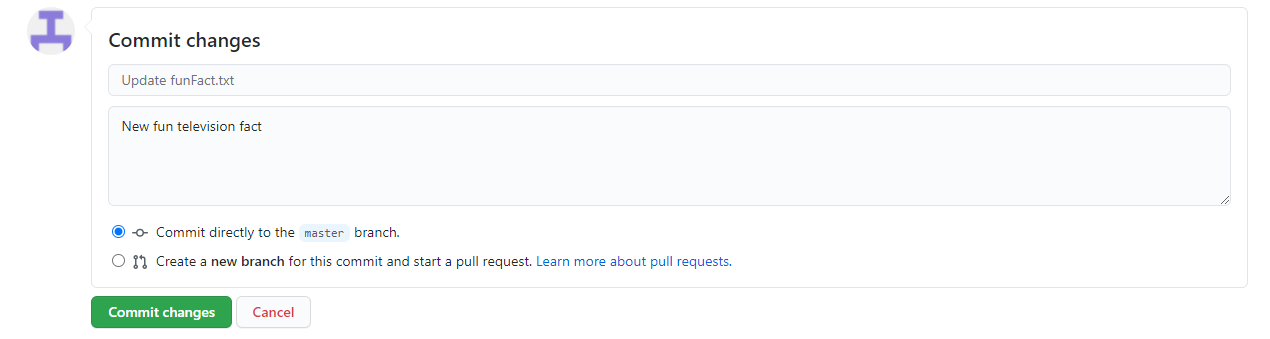

Once we've made some changes to the repository remotely on GitHub, we can bring them back to our local copy by using the `git pull` command and specifying which remote repository (origin) and which branch(es) we are interested in retrieving. Back in your terminal or Linux distribution enter the following command: 

In [ ]:
git pull origin master

In [ ]:
git log

### You made it through this intro! Great job!
Let the TAs know if you have any questions and we will expand upon these lessons in class.